<a href="https://colab.research.google.com/github/SelmaDM/Signal_Treatement/blob/master/D%C3%A9composition%20d'une%20image%20en%20fr%C3%A9quences.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as scp

In [ ]:
img = plt.imread('lena.jpg')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#I. Image et domaine spectral

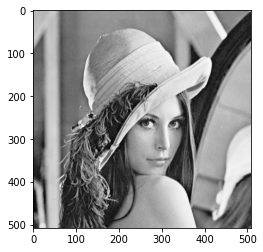

In [ ]:
plt.imshow(img, cmap='Greys_r')

In [ ]:
#Calculez la représentation fréquentielle de l'image
fourier_freq = np.fft.fft2(img)

In [ ]:
#le résultat est une matrice complexe de même dimension que la matrice de départ
print(fourier_freq)

[[ 3.20801010e+07+1.74622983e-10j -4.28225509e+05+2.37409369e+06j
   1.53553769e+06-1.13296642e+06j ... -1.79879236e+05-6.55431946e+05j
   1.53553769e+06+1.13296642e+06j -4.28225509e+05-2.37409369e+06j]
 [-4.53312037e+03-1.20661668e+06j -1.52968349e+06+1.62128168e+06j
  -1.09005269e+06+1.55195911e+05j ...  6.30842725e+05+8.01247390e+05j
  -3.34939539e+05+4.32437869e+05j  3.87495793e+04+9.39280285e+05j]
 [-4.54234340e+05-1.51222474e+05j -2.82969008e+05-7.57380580e+04j
   6.49620202e+05-4.60546349e+05j ...  3.43512562e+05+9.38558889e+05j
  -6.93132669e+05-1.89781217e+05j  8.16968576e+05-2.38997089e+04j]
 ...
 [ 4.95925013e+05-2.29295713e+05j  7.54834082e+05+6.95878991e+05j
  -5.33911018e+05-1.71590876e+05j ...  9.94650057e+05+1.39134383e+05j
   1.26936995e+05-6.38585752e+05j -7.46153233e+04+5.90901137e+05j]
 [-4.54234340e+05+1.51222474e+05j  8.16968576e+05+2.38997089e+04j
  -6.93132669e+05+1.89781217e+05j ... -5.06908109e+05-7.86158241e+05j
   6.49620202e+05+4.60546349e+05j -2.82969008e+

In [ ]:
#calculer le module
spectre = np.abs(fourier_freq)
print(spectre)

[[32080101.          2412405.00611414  1908268.56241634 ...
    679667.25314077  1908268.56241634  2412405.00611414]
 [ 1206625.19157869  2229010.06667799  1101045.25011703 ...
   1019784.25366944   546979.8947109    940079.24295198]
 [  478745.30996627   292929.53532833   796309.83111333 ...
    999446.68099989   718644.42344299   817318.08407708]
 ...
 [  546368.13817366  1026655.76632813   560806.92262792 ...
   1004334.16398477   651079.69058648   595593.48602016]
 [  478745.30996627   817318.08407708   718644.42344299 ...
    935414.67273544   796309.83111333   292929.53532833]
 [ 1206625.19157869   940079.24295198   546979.8947109  ...
   1903221.28263136  1101045.25011703  2229010.06667799]]


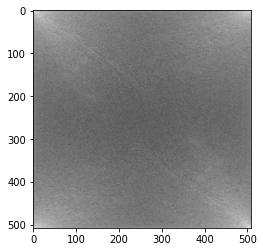

In [ ]:
#Afficher le résultat suivant une échelle logarithmique des intensités
logspec = np.log(spectre)
plt.imshow(logspec, cmap ='Greys_r')

In [ ]:
# II. Localisation des hautes et des basses fréquences 

[[162.+1.77635684e-14j 162.+5.68434189e-14j 160.+3.90798505e-14j ...
  169.-3.90798505e-14j 171.-8.79296636e-14j 168.-3.01980663e-14j]
 [163.+7.83817455e-14j 162.+5.30686606e-14j 161.+3.81916720e-14j ...
  169.+5.19584376e-14j 169.-4.92939023e-14j 169.-2.97539771e-14j]
 [163.+6.21724894e-14j 161.+7.81597009e-14j 160.-7.99360578e-15j ...
  174.+8.43769499e-14j 174.-6.92779167e-14j 168.-4.44089210e-15j]
 ...
 [ 49.+8.88178420e-16j  54.-5.46229728e-14j  48.-4.84057239e-14j ...
   88.-5.77315973e-14j  96.-7.90478794e-14j  96.-6.21724894e-14j]
 [ 44.+7.70494779e-14j  51.+1.01696429e-13j  45.-3.50830476e-14j ...
   92.+6.97220059e-14j 102.-6.12843110e-14j 102.+4.75175455e-14j]
 [ 41.-1.31006317e-14j  53.+1.17406085e-13j  47.-3.99680289e-14j ...
   97.+2.03170814e-14j 101.-8.55981952e-14j 102.+5.77315973e-15j]]


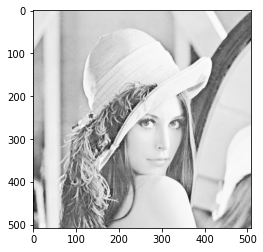

In [ ]:
fourier_inv = np.fft.ifft2(fourier_freq)
print(fourier_inv)
spectre_inv = np.abs(fourier_inv)
logspec_inv = np.log(spectre_inv)
plt.imshow(logspec_inv, cmap ='Greys_r')

In [ ]:
vcpourc = (25*len(logspec))/100


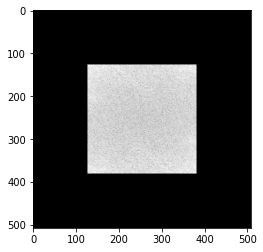

In [ ]:
#####  matrice centre 25% supp exte
matrice_cent = np.zeros((508,508))
matrice_remp = logspec
matrice_cent[127: 381, 127: 381] = matrice_remp[127: 381, 127: 381]
plt.imshow(matrice_cent, cmap = 'Greys_r')

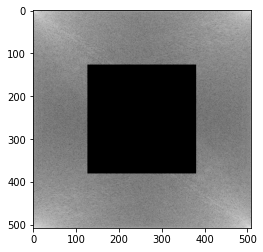

In [ ]:
###### matrice exterrieur 25% supp au centre
matrice_ext = matrice_remp
matrice_ext[127: 381, 127: 381] = np.zeros((254,254))
plt.imshow(matrice_ext, cmap = 'Greys_r')

In [ ]:
#Réduction du bruit dans une image

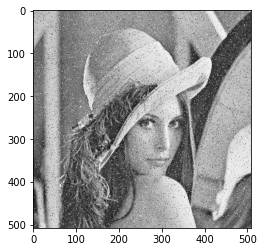

In [ ]:
img_b = plt.imread('img_b.jpg')
plt.imshow(img_b, cmap='Greys_r')

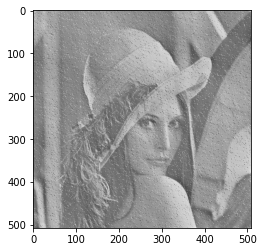

In [ ]:
spec_fourier = np.fft.fft2(img_b)
mat_base = spec_fourier
mat_cent = np.zeros((508,508), dtype = float)
mat_base[0:205, 0:205] = mat_cent[0:205, 0:205]
mat_base = np.real(np.fft.ifft2(mat_base))
plt.imshow(mat_base, cmap='Greys_r')

In [ ]:
import cv2 as cv

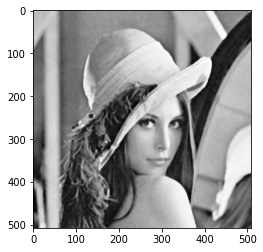

In [ ]:
res = cv.medianBlur(img_b, 5)
plt.imshow(res, cmap='Greys_r')